In [1]:
#%config IPCompleter.greedy=True

In [2]:
#Import all the libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def waitForInput():
    cv2.waitKey()
    cv2.destroyAllWindows()

In [4]:
#Read an image from the current directory. Blue-Green-Red
image = cv2.imread("grapefruit.jpg",cv2.IMREAD_COLOR)
gray_scale_image = cv2.imread("grapefruit.jpg",cv2.IMREAD_GRAYSCALE)

#Show some of the properties of the image.
print("The shape of the image is {0}".format(image.shape))
print("The type of the image matrix is {0}".format(type(image)))

The shape of the image is (332, 332, 3)
The type of the image matrix is <class 'numpy.ndarray'>


In [5]:
#Show the colored and gray scaled images. 
cv2.imshow("Colored Image", image)
cv2.imshow("Gray Scaled Image", gray_scale_image)
waitForInput()

In [6]:
#Change the color space of the image.
gray_scale_image_2 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Scaled Image 2", gray_scale_image_2)
waitForInput()

In [7]:
#Change the dimensions of the image.
image_2 = cv2.imread("colors.jpg")

resized_1 = cv2.resize(image_2,(600,600),interpolation=cv2.INTER_LINEAR) #Bilinear
resized_2 = cv2.resize(image_2,interpolation=cv2.INTER_NEAREST,dsize=(600,600)) #Nearest Neighbor
resized_3 = cv2.resize(image_2,(600,600),interpolation=cv2.INTER_CUBIC) #Bicubic

cv2.imshow("Original Image",image_2)
cv2.imshow("Bilinear Interpolation", resized_1)
cv2.imshow("Nearest Neighbor", resized_2)
cv2.imshow("Bicubic", resized_3)
waitForInput()

In [8]:
#Mask the image 
lower_mask = np.array([200,200,20])
upper_mask = np.array([255,255,90])

# Threshold the image to get only the specified color interval 
masked_binary_image = cv2.inRange(image_2, lower_mask, upper_mask)

# Bitwise-and the mask and the original image
result_image = cv2.bitwise_and(image_2, image_2, mask=masked_binary_image)
print(image_2.shape)
print(masked_binary_image.shape)

cv2.imshow('Original Image',image_2)
cv2.imshow('Created Mask', masked_binary_image)
cv2.imshow('Result',result_image)
waitForInput()

(300, 400, 3)
(300, 400)


In [9]:
#Blur the image
blurred_image = cv2.medianBlur(image_2,9)
blurred_image_2 = cv2.GaussianBlur(image_2,(9,9),0)

cv2.imshow("Original Image",image_2)
cv2.imshow("Median Blurred Image",blurred_image)
cv2.imshow("Gaussian Blurred Image",blurred_image_2)
waitForInput()

In [10]:
#Filtering
kernel_1 = np.zeros((3,3))
kernel_1[:,1] = 1
print(kernel_1)

print("\n\n")

kernel_2 = np.zeros((3,3))
kernel_2[1,:] = 1
print(kernel_2)

gray_image_2 = cv2.cvtColor(image_2,cv2.COLOR_BGR2GRAY)

vertical_filtered_image = cv2.filter2D(gray_image_2,-1,kernel_1)
horizontal_filtered_image = cv2.filter2D(gray_image_2,-1,kernel_2)
after_sobel = np.add(cv2.Sobel(gray_image_2,-1,1,1),np.ones_like(gray_image_2)*255)

filtered_image = cv2.add(vertical_filtered_image,horizontal_filtered_image)

cv2.imshow("Filtered Image",filtered_image)
cv2.imshow("Sobel Operator",after_sobel)
waitForInput()


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]



[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]


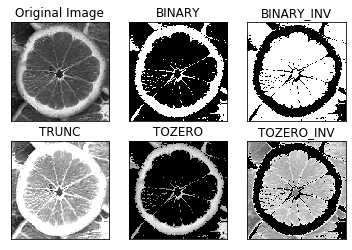

In [11]:
#Thresholding

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


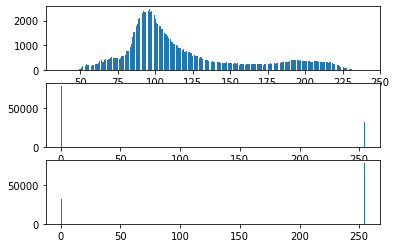

In [12]:
#Histograms

plt.subplot(3,1,1)

for i in range(3):
    plt.subplot(3,1,i+1)
    plt.hist(images[i].ravel(),256)
plt.show()


In [17]:
#Contours 

im = cv2.imread("road.jpg",1)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 190, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0,255,0), 3)
cv2.imshow("Contours",im)
waitForInput()